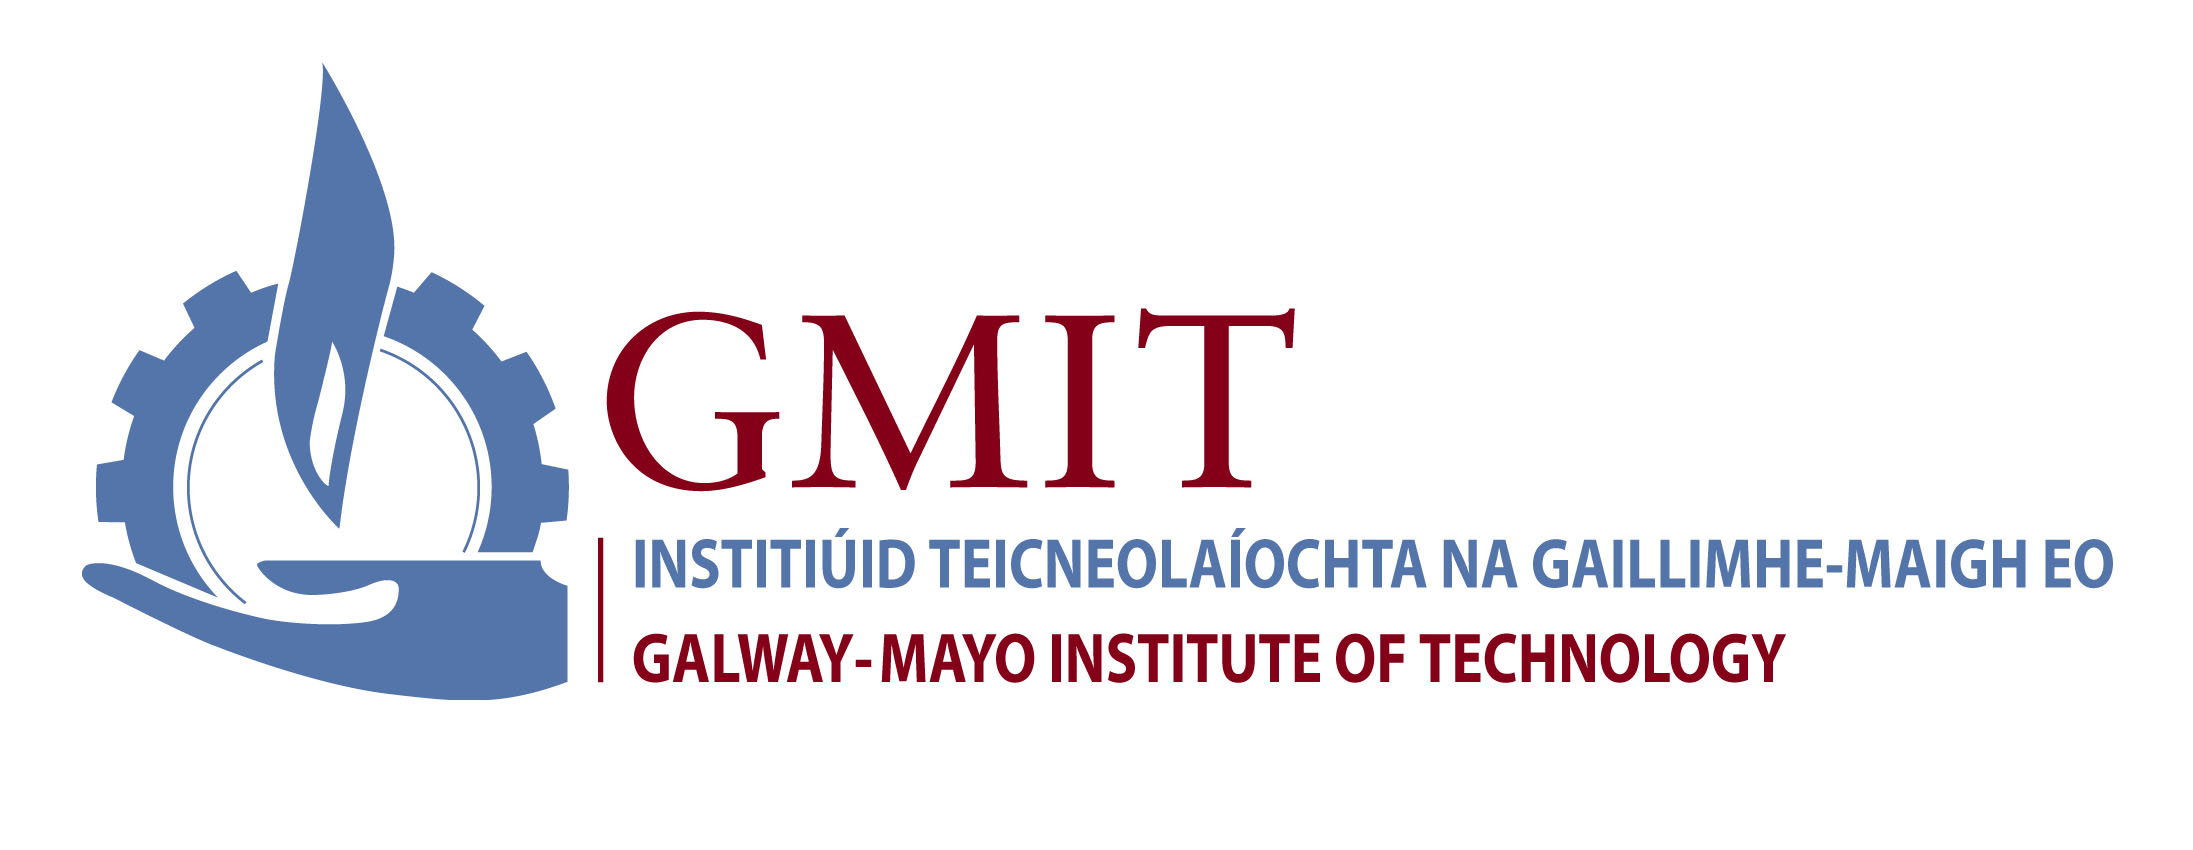

Machine Learning and Statistics 2021
 
 
 **Author:**  Richard Deegan 
 
 
 **Lecturer:** Ian McLoughlin
 
 
 **Student ID:** G00387896@gmit.ie

# Assessment Outline 

Include a Jupyter notebook called scipy-stats.ipynb that contains the following:

10% A clear and concise overview of the scipy.stats Python library.

20% An example hypothesis test using ANOVA. You should find a data set on which
it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats.

10% Appropriate plots and other visualisations to enhance your notebook for viewers.

# Preliminaries 

In order to effectively answer the Problem Statement various relevant libraries must be imported. For this we will import Numpy as it contains essential libraries namely the numpy.random library. Matplotlib.plyplot and Seaborn libraries will be utilised to assist in the visualisation of numbers to user friendly graphs.

In [1]:
# Import the the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import binom
from scipy import stats

The magic inline command will be utilised in order to ensure the correct display of the plots within the Jupyter Notebook. This will allow the plots to be rendered inline within the Notebook [1].

In [2]:
# Magic command used to visualise plots in Jupyter
%matplotlib inline

# Overview of Scipy-Stats

All of the statistics functions are located in the sub-package scipy.stats and a fairly complete listing of these functions can be obtained using info(stats) function. A list of random variables available can also be obtained from the docstring for the stats sub-package. This module contains a large number of probability distributions as well as a growing library of statistical functions.

Statistics is a very large area, and there are topics that are out of scope for SciPy and are covered by other packages. Some of the most important ones are:

* statsmodels: regression, linear models, time series analysis, extensions to topics also covered by scipy.stats.

* Pandas: tabular data, time series functionality, interfaces to other statistical languages.

* PyMC3: Bayesian statistical modeling, probabilistic machine learning.

* scikit-learn: classification, regression, model selection.

* Seaborn: statistical data visualization.

* rpy2: Python to R bridge.



Each univariate distribution has its own subclass:

* **rv_continuous:**  A generic continuous random variable class meant for subclassing
<br>

* **rv_discrete:**  A generic discrete random variable class meant for subclassing
<br>

* **rv_histogram:** Generates a distribution given by a histogram
<br>

<center> Normal Continuous Random Variable <center/>
    
<br>
    
A probability distribution in which the random variable X can take any value is continuous random variable. The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods and completes them with details specific for this particular distribution.

To compute the CDF at a number of points, we can pass a list or a NumPy array. Let us consider the following example.




In [3]:
# Cumulative Distribution Function (CDF)
norm.cdf(np.array([1,-1., 0, 1, 3, 4, -2, 6]))

array([0.84134475, 0.15865525, 0.5       , 0.84134475, 0.9986501 ,
       0.99996833, 0.02275013, 1.        ])

to find the median we can simply use the Percent Point Function (PPF)

In [4]:
# ppf 
norm.ppf(0.5)


0.0

In [5]:
# to generate random variates use the following
norm.rvs(size = 5)

array([-0.87179053,  1.1918761 , -0.14624415,  0.55294625,  0.79066533])

<br> <br> <br>

<center> Uniform Distribution <center/>

A uniform distribution can be generated using the uniform function.



In [6]:
uniform.cdf([0, 1, 2, 3, 4], loc = 0, scale = 4)
s = uniform.cdf([0, 1, 2, 3, 4], loc = 0, scale = 4)
s

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

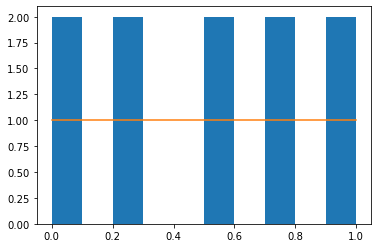

In [7]:
count, bins, ignored = plt.hist(s, 10, density=True)
plt.plot(bins, np.ones_like(bins))
plt.show()

 <br> <br> <br>

<center> Discrete Distribution <center/>

**Binomial Distribution:** As an instance of the rv_discrete class, the "binom object" inherits from it a collection of generic methods and completes them with details specific for this particular distribution.



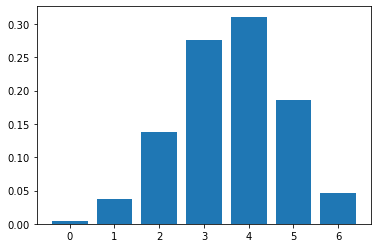

In [8]:
n = 6
p = 0.6
# defining list of r values
r_values = list(range(n + 1))

# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]

# plotting the graph 
plt.bar(r_values, dist)
plt.show()

<br><br><br>

<center> Descriptive Statistics <center/>


The basic stats such as Min, Max, Mean and Variance takes the NumPy array as input and returns the respective results. A few basic statistical functions available in the scipy.stats package are described in the following table.



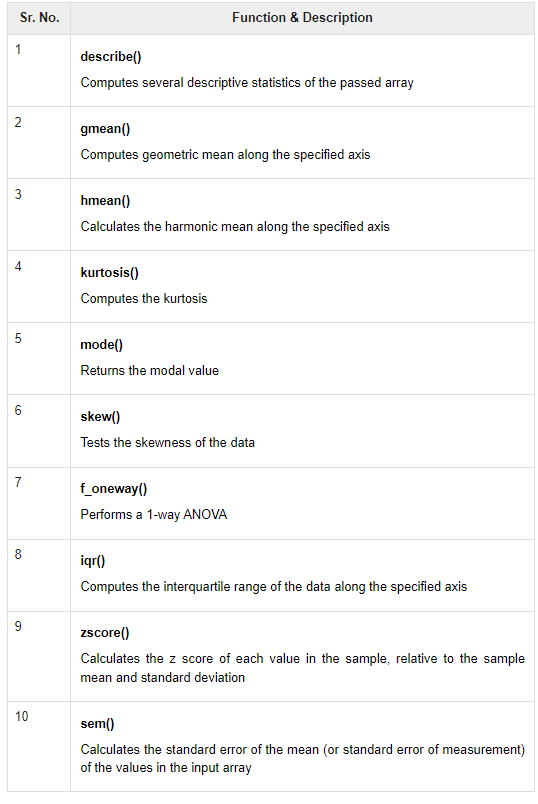

In [9]:
# create np array for use by discriptive methods
np.arange(10)
x= np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
print(x.min())   # equivalent to np.min(x)
-3.78975572422  # random
print(x.max())   # equivalent to np.max(x)
5.26327732981  # random
print(x.mean())  # equivalent to np.mean(x)
0.0140610663985  # random
print(x.var())   # equivalent to np.var(x))
1.28899386208  # random


0
9
4.5
8.25


1.28899386208

<br><br><br>

<center> T-test <center/>

**ttest_1samp** is used to calculate the T-test for the mean of ONE group of scores. This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations ‘a’ is equal to the given population mean, popmean. 


In [11]:
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
stats.ttest_1samp(rvs,5.0)

Ttest_1sampResult(statistic=array([-1.53897602, -1.8040491 ]), pvalue=array([0.13024352, 0.07737232]))

In [12]:
# sample one
rvs1 = stats.norm.rvs(loc = 5,scale = 10,size = 500)

# sample two 
rvs2 = stats.norm.rvs(loc = 5,scale = 10,size = 500)


In [13]:
# show output
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=0.5896382705105975, pvalue=0.5555666480437322)

p-value is a measure of the probability that an observed difference could have occurred just by random chance.
The lower the p-value, the greater the statistical significance of the observed difference.
A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5%

**Therefore, we reject the null hypothesis, and accept the alternative hypothesis**

However in this example it is 77%



There are certain conditions that need to be met in order for the T-test results to be considered reliable [1]:

1. Dependent variables should be measured on a continuous scale
2. Independent variable should consist of two categorical, independent groups
3. Independence of observations should exist
4. There should be no significant outliers.
5. Dependent variables should be approximately normally distributed for each group of the independent variables.


<center> Summary Statistics <center/>

the summary statistics focuses on descriptive statistical sub-functions. The min, max, mean values from the input NumPy arrays are evaulated. popular funcations are:

* describe() - it returns descriptive stats of the arrays.
* bootstrap() - Compute a two-sided bootstrap confidence interval of a statistic.
* gmean()- it returns the geometric mean along a specific axis of an array.
* hmean() - it returns the harmonic mean along a specific axis of an array.
* sem() - it returns the standard error mean of the mean.
* kurtosis() - it returns the kurtosis value of an array.
* mode() - it returns the mode of an array.
* mvsdist()- Frozen distributions for mean, variance, and standard deviation of data.
* skew() - it is to perform the skew test on an array.
* zscore() - it returns the z-score relative to the mean and standard deviation values.
* variation()- Compute the coefficient of variation.

<center> Frequency statistics <center/>
    
Examples:


* cumfreq()- Return a cumulative frequency histogram, using the histogram function.

* itemfreq()-itemfreq is deprecated! itemfreq is deprecated and will be removed in a future version.

* percentileofscore()-Compute the percentile rank of a score relative to a list of scores.

* scoreatpercentile()-Calculate the score at a given percentile of the input sequence.

* relfreq()- Return a relative frequency histogram, using the histogram function.

* binned_statistic()-Compute a binned statistic for one or more sets of data.

* binned_statistic_2d()-Compute a bidimensional binned statistic for one or more sets of data.

* binned_statistic_dd()-Compute a multidimensional binned statistic for a set of data.

<Center> Statistical distances <Center>

Examples:


* wasserstein_distance()-Compute the first Wasserstein distance between two 1D distributions.

* energy_distance-() Compute the energy distance between two 1D distributions.

<Center> Random variate generation / CDF Inversion <Center>

Examples:


* rvs_ratio_uniforms()-Generate random samples from a probability density function using the ratio-of-uniforms method.

* NumericalInverseHermite()- A Hermite spline fast numerical inverse of a probability distribution.

<Center> Circular statistical functions <Center>

Examples:


* circmean()- Compute the circular mean for samples in a range. 

* circvar()- Compute the circular variance for samples assumed to be in a range.



<Center> Contingency table functions <Center>

Examples:

* chi2_contingency()- Chi-square test of independence of variables in a contingency table.

* contingency.crosstab()-Return table of counts for each possible unique combination in *args.

* contingency.expected_freq()- Compute the expected frequencies from a contingency table.





 <center> Plot-tests <center/>
    
 Examples:

* ppcc_max()- Calculate the shape parameter that maximizes the PPCC.

* ppcc_plot()- Calculate and optionally plot probability plot correlation coefficient.

* probplot()- Calculate quantiles for a probability plot, and optionally show the plot.

* boxcox_normplot()- Compute parameters for a Box-Cox normality plot, optionally show it.



 <center> Univariate and multivariate kernel density estimation  <center/>


* gaussian_kde()- Representation of a kernel-density estimate using Gaussian kernels  

 <center> Warnings used in scipy.stats  <center>
    
 Examples:

* F_onewayConstantInputWarning()- Warning generated by f_oneway when an input is constant, e.g.

* \F_onewayBadInputSizesWarning- Warning generated by f_oneway when an input has length 0, or if all the inputs have length 1.

* PearsonRConstantInputWarning()- Warning generated by pearsonr when an input is constant.

* PearsonRNearConstantInputWarning()-Warning generated by pearsonr when an input is nearly constant.

* SpearmanRConstantInputWarning()- Warning generated by spearmanr when an input is constant.

<center/> Quasi-Monte Carlo <center/>

In Monte Carlo (MC) sampling the sample averages of random quantities are used
to estimate the corresponding expectations. The justification is through the law of
large numbers. In quasi-Monte Carlo (QMC) sampling we are able to get a law
of large numbers with deterministic inputs instead of random ones. Naturally we
seek deterministic inputs that make the answer converge as quickly as possible. In
particular it is common for QMC to produce much more accurate answers than MC
does. Keller was an early proponent of QMC methods for computer graphics. 
This module provides Quasi-Monte Carlo generators and associated helper functions[3].




# Anova

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. This example will provide a brief introduction to the one-way ANOVA and the underlying assumptions of the test [13, 14].



**Overview:** Essentially the one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. Specifically, it tests the null hypothesis [6].




**when should you use it:** Use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels (i.e. at least three different groups or categories). ANOVA tells you if the dependent variable changes according to the level of the independent variable [7].



**Assumptions:** Assumptions of ANOVA
The assumptions of the ANOVA test are the same as the general assumptions for any parametric test:

1. **Assumption One- Independence of observations:** the data were collected using statistically-valid methods, and there are no hidden relationships among observations. If your data fail to meet this assumption because you have a confounding variable that you need to control for statistically, use an ANOVA with blocking variables [15].


2. **Assumption Two- Normally-distributed** response variable: The values of the dependent variable follow a normal distribution [12].


3. **Assumption Three- Homogeneity of variance:** The variation within each group being compared is similar for every group. If the variances are different among the groups, then ANOVA probably isn’t the right fit for the data [8].




# Types of ANOVA Tests


* One-Way ANOVA: A one-way ANOVA has just one independent variable: For example, differences in Corona cases can be assessed by Country, and a Country can have 2, 20, or more different categories to compare [9].




* Two-Way ANOVA: A two-way ANOVA (also called factorial ANOVA) refers to an ANOVA using two independent variables Expanding the example above, a two-way ANOVA can examine differences in Corona cases (the dependent variable) by Age group (independent variable 1) and Gender (independent variable 2). Two-way ANOVA can be used to examine the interaction between the two independent variables. Interactions indicate that differences are not uniform across all categories of the independent variables For example, Old Age Group may have higher Corona cases overall compared to the Young Age group, but this difference could be greater (or less) in Asian countries compared to European countries [10].



* N-Way ANOVA: A researcher can also use more than two independent variables, and this is an n-way ANOVA (with n being the number of independent variables you have), aka MANOVA Test. For example, potential differences in Corona cases can be examined by Country, Gender, Age group, Ethnicity, etc, simultaneously. An ANOVA will give you a single (univariate) f-value while a MANOVA will give you a multivariate F-value [11].





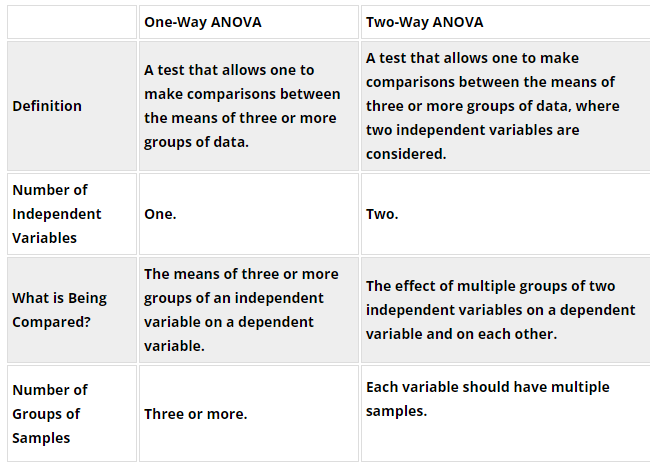

https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553

In [14]:
import pandas as pd
import numpy as np
np.random.seed(99)

In [15]:
# use numpy to generate random data for student exam results in 3 countries
IRL = np.random.normal(loc=74,scale=4,size=40)
NI = np.random.normal(loc=88,scale=4,size=40)
FRA = np.random.normal(loc=84,scale=4,size=40)

In [16]:
# for loop used to round the mean of the numbers 
for i in range(3):
    print(['IRL: ','NI: ','FRA: '][i],[IRL,NI,FRA][i].mean().round(1))

IRL:  74.0
NI:  88.3
FRA:  85.1


In [17]:
# Create a list for IRL and put list into a dataframe representing each student group
list_IRL = []
for i in range(40): list_IRL.append('IRL')
# use lambda function and store in dataframe
df_IRL = pd.DataFrame(data={'Country':list_IRL,'Results':list(map(lambda x: x.round(1), IRL))})

In [18]:
# Create a list for NI and put list into a dataframe representing each student group
list_NI = []
for i in range(40): list_NI.append('NI')
# use lambda function and store in dataframe
df_NI = pd.DataFrame(data={'Country':list_NI,'Results':list(map(lambda x: x.round(1), NI))})

In [19]:
# Create a list for FRA and put list into a dataframe representing each student group
list_FRA = []
for i in range(40): list_FRA.append('FRA')
# use lambda function and store in dataframe
df_FRA = pd.DataFrame(data={'Country':list_FRA,'Results':list(map(lambda x: x.round(1), FRA))})

In [20]:
# merge the data frames into one for easier viewing by appending to IRL dataframe
df_students = df_IRL.append([df_NI,df_FRA],ignore_index=True)
df_students

,Country,Results
0,IRL,73.4
1,IRL,82.2
2,IRL,75.1
3,IRL,79.3
4,IRL,73.4
...,...,...
115,FRA,79.9
116,FRA,86.7
117,FRA,86.2
118,FRA,83.5


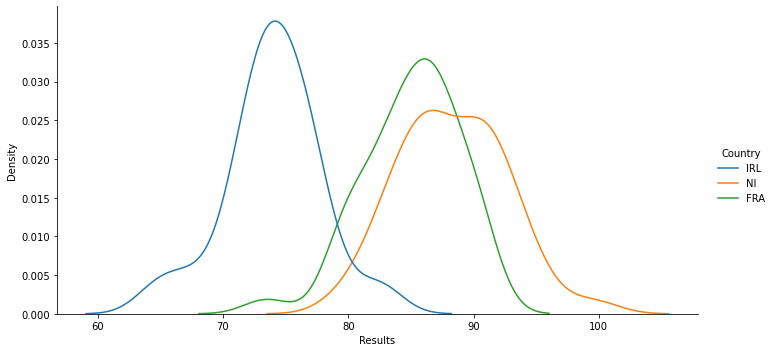

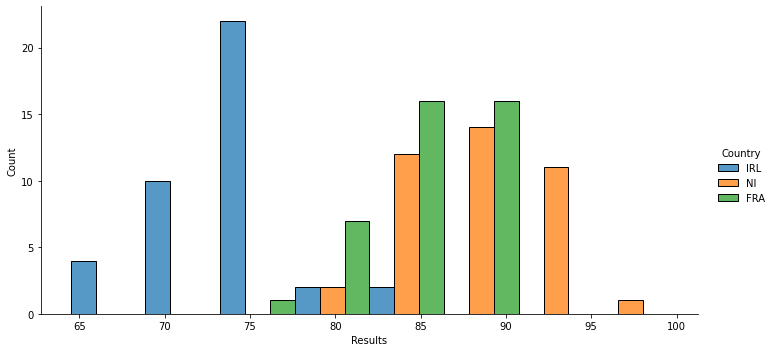

In [29]:
# Visualise the DataFrame to view the data 
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
sns.displot(df_students,x='Results',hue='Country',multiple='dodge',height=5,aspect=2)

<br><br><br>

# Assumption One- Independent Observations

the assumption of independent observations in this instance is based on the knowledge of the author of the data and its source.  To ensure that the data is independent the author must ensure no cross contamination of data. For example, if some students represented IRL and NI at the same time then the data would be skewed, and the assumption of independent observations would be void.  However, in this case we can say that we meet the requirements of **Assumption One** and can conduct our ANOVA test.

<br>

# Assumption Two- Normality

Chen and Shapiro (1995) introduced a test for normality that compares the spacings between order statistics with the spacings between their expected values under
normality. 

The **def shapiro_test(x)** function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to make a judgement about the normality of the data. If the p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed [5].

In [26]:
# Normality test using shapiro_test function [4]
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05: # P-value of significance [16]
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P-value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test did not show non-normality, W= {round(test.statistic,2)}, P-value= {round(test.pvalue,2)}. No evidence to REJECT the null hypothesis of normality."

# display results from shapiro test
for i in range(3):
    print("-------------------------")
    print("Shapiro Wilk Test Results")
    print("-------------------------")
    print(["For IRL: ","For NI: ","For FRA: "][i], shapiro_test([IRL,NI,FRA][i]))
    print('\n')

-------------------------
Shapiro Wilk Test Results
-------------------------
For IRL:  Shapiro Wilk Test did not show non-normality, W= 0.97, P-value= 0.27. No evidence to REJECT the null hypothesis of normality.


-------------------------
Shapiro Wilk Test Results
-------------------------
For NI:  Shapiro Wilk Test did not show non-normality, W= 0.98, P-value= 0.85. No evidence to REJECT the null hypothesis of normality.


-------------------------
Shapiro Wilk Test Results
-------------------------
For FRA:  Shapiro Wilk Test did not show non-normality, W= 0.95, P-value= 0.07. No evidence to REJECT the null hypothesis of normality.




# Assumption Three- Homogeneity

We can use **Bartlett’s Test** or **Levene Test**
<br>

<center> Bartlett’s test <center/>
    <br>
    

Bartlett’s test was introduced in 1937 by Maurice Bartlett (1910–2002) and is an inferential procedure used to assess the equality of variance in different populations. Bartlett’s test of homogeneity of variance is based on a chi-square statistic with (k − 1) degrees of freedom, where k is the number of categories (or groups) in the independent variable. In other words, Bartlett’s test is used to test if k populations have equal variances [17.]



Example, if we wish to conduct the following hypothesis:

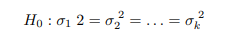

The test statistic has the following expression:

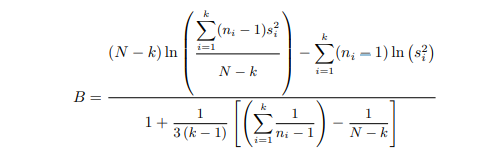

where N corresponds to the sum of all sample sizes. It is asymptotically distributed as a χ2 distribution with (k − 1) degrees of freedom. The null hypothesis of equal population variances is rejected if test statistics is larger than the critical value. One may also use online tools to perform this test, under condition that each sample contains at least five observations [17].

<center> Levene Test <center/>

The Levene’s test uses an F-test to test the null hypothesis that the variance is equal across groups.  A p value less than .05 indicates a violation of the assumption.  If a violation occurs, it is likely that conducting the non-parametric equivalent of the analysis is more appropriate [18]. For Levene’s test of the homogeneity of group variances, the residuals eij of the group means from the cell means are calculated as follows [19]:

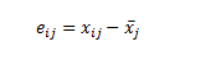

An ANOVA is then conducted on the absolute value of the residuals. If the group variances are equal, then the average size of the residual should be the same across all groups.



In [34]:
# Initial look at the variances between countries
[round(np.var(x, ddof=1),3) for x in [IRL,NI,FRA]]

[14.311, 17.861, 14.193]

In [30]:
# Bartlett Test [20]
from scipy.stats import bartlett

alpha = 0.05
stat, p_bartlet = bartlett(IRL,NI,FRA)
if p_bartlet <= alpha:
    print(p_bartlet,": SMALL P-value indicates data of NOT EQUAL variances")
else:
    print(p_bartlet, ": LARGE P-value indicates data of EQUAL variances")

0.715017901418342 : LARGE P-value indicates data of EQUAL variances


In [31]:
# Levene's Test [21]
from scipy.stats import levene

alpha = 0.05
w_stats, p_value =levene(IRL,NI,FRA, center ='mean')
if p_value > alpha :
  print("We DO NOT REJECT the null hypothesis")
else:
  print("REJECT the Null Hypothesis")

We DO NOT REJECT the null hypothesis


# Null and Alternative Hypothesis



<center>Null Hypothesis<center/>

This is the default hypothesis against the initial assumptions which would suggest that NO statistically significant difference exists between the data groups. For example, there is no statistically significant difference between the means of IRL and FRA data. 

Therefore H0 is equal to the following:

**H0:** There is no statistically significant difference between the groups of students in IRL, NI and FRA data. 


<center>Alternative Hypothesis<center/>

The alternative hypothesis states the assumption. For example, the mean data in NI is statistically significantly different than the mean data in IRL. 

Therefore H1 is equal to the following:

**H1:** There is a statistically significant difference between the data of the students in NI and IRL.  This difference is based upon their country. 


# Alpha Value, F-Critical value, and P-Value

<center>Alpha Value<center>

In [ ]:
# Setting up alpha value, 0.05α level is appropriate
alpha = 0.05

Alpha value can be dependent on the nature of the study, however for the most part a value of 0.05 is used. This number reflects the probability of obtaining results as extreme as what you obtained in your sample if the null hypothesis was true [23]. 

In [ ]:

print("Overall Mean",round(df_students.Results.mean(),2))
print("------------------")
for i in df_students.Country.unique():
    print(f'{i} Mean : ',round(df_students[df_students.Country == i].Results.mean(),2))
print("------------------")

In [ ]:
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
plt.axvline(x=df_students.Results.mean(),ymin=0,ymax=0.95,label='overall mean',color='r')
plt.axvline(x=df_students[df_students.Country == 'NI'].Results.mean(),ymin=0,ymax=0.72,linestyle="--",label='NI mean',color='orange')
plt.axvline(x=df_students[df_students.Country == 'FRA'].Results.mean(),ymin=0,ymax=0.95,linestyle="--",label='FRA mean',color='g')
plt.axvline(x=df_students[df_students.Country == 'IRL'].Results.mean(),ymin=0,ymax=0.72,linestyle="--",label='IRL mean',color='steelblue')
plt.axhline(y=0.042,xmin=0.533,xmax=0.583,color='g',label='Mean Difference FRA',linestyle='-.')
plt.axhline(y=0.0325,xmin=0.332,xmax=0.533,color='steelblue',label='Mean Difference IRL',linestyle='-.')
plt.axhline(y=0.0318,xmin=0.533,xmax=0.675,color='orange',label='Mean Difference NI',linestyle='-.')
plt.legend()
plt.show()

# References 

[1] SPSS Tutorials - SPSS Shapiro-Wilk Test – Quick Tutorial with Example [online] available: https://www.sps s-tutorials.com/spss-shapiro-wilk-test-for-normality/
[2] Docs.scipy  [online] available:  https://docs.scipy.org/doc/scipy/reference/stats.html
[3] Quasi-Monte Carlo[online] available:  https://artowen.su.domains/reports/siggraph03.pdf
[4] Methods for Normality Test with Application in Python [online] available: https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5
[5] Statistical tests for normality [online] available: https://campus.datacamp.com/courses/introduction-to-portfolio-risk-management-in-python/univariate-investment-risk-and-returns?ex=12
[6] Statistical-guide [online] available: https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php
[7] One-way-anova [online] available: 
https://www.scribbr.com/statistics/one-way-anova/
[8] Checking_ANOVA_assumptions [online] available: https://yieldingresults.org/wp-content/uploads/2015/03/Checking_ANOVA_assumptions.html
[9] One-way-anova-using-spss-statistics [online] available: https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
[10] Statology [online] available: https://www.statology.org/two-way-anova/

[11] Pythonfordatascience [online] available: https://www.pythonfordatascience.org/factorial-anova-python/
[12] theanalysisfactor [online] available: https://www.theanalysisfactor.com/checking-normality-anova-model/
[13] Kim, T.K., 2017. Understanding one-way ANOVA using conceptual figures. Korean journal of anesthesiology, 70(1), p.22.

[14] Heiberger, R.M. and Neuwirth, E., 2009. One-way anova. In R through excel (pp. 165-191). Springer, New York, NY.
[15]Scariano, S.M. and Davenport, J.M., 1987. The effects of violations of independence assumptions in the one-way ANOVA. The American Statistician, 41(2), pp.123-129.
[16] Di Leo, G. and Sardanelli, F., 2020. Statistical significance: p value, 0.05 threshold, and applications to radiomics—reasons for a conservative approach. European radiology experimental, 4(1), pp.1-8.
[17] Arsham, H. and Lovric, M., 2011. Bartlett's Test. [online] available: https://www.researchgate.net/profile/Dr-Hossein-Arsham/publication/344731676_BARTLETT'S_TEST/links/5f8ce5cb299bf1b53e324a18/BARTLETTS-TEST.pdf
[18] The Assumption of Homogeneity of Variance [online] available https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/
[19] Levene’s Test [online] available: https://www.real-statistics.com/one-way-analysis-of-variance-anova/homogeneity-variances/levenes-test/
[20] How to Perform Bartlett’s Test in Python (Step-by-Step) [online] available: https://www.statology.org/bartletts-test-python/
[21] Levene’s test [online] available: https://www.geeksforgeeks.org/levenes-test/
[23] HYPOTHESIS TESTING [online] available: https://www.westga.edu/academics/research/vrc/assets/docs/HypothesisTesting_HANDOUT.pdf
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:
[] [online] available:

In [ ]:
[]

In [ ]:
[][][][][][][][][][][][][][][][][][]